# 10.1 - Simulations with random numbers

## Excercise 8: Random walk with drift
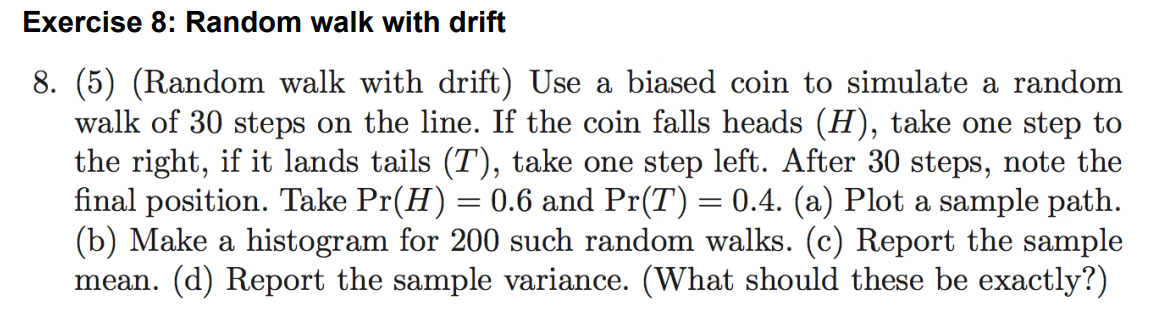

In [1]:
import numpy as np
import scipy.stats as sts
from matplotlib import pyplot as plt


In [2]:
def random_walk(steps, bias):
    coin_flips = sts.bernoulli(bias).rvs(steps)    #Flip coins
    coin_flips = [-1 if x==0 else x for x in coin_flips] #Replace 0s with -1s 
    path = np.cumsum(coin_flips) #Compute path using cumulative sum
    
    return path

## Plotting a sample path

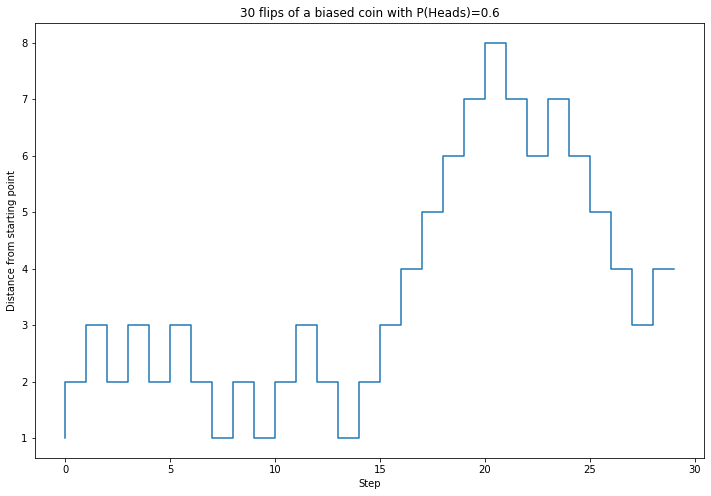

In [3]:
steps = 30
bias = 0.6

a_random_walk = random_walk(steps, bias)

plt.figure(figsize=(12, 8))
plt.step(list(range(steps)), a_random_walk)
plt.title("30 flips of a biased coin with P(Heads)=0.6")
plt.xlabel("Step")
plt.ylabel("Distance from starting point")
plt.show()

That the distance from the starting point changes by 1 at each timesteps gives me confidence that the random walk function works.

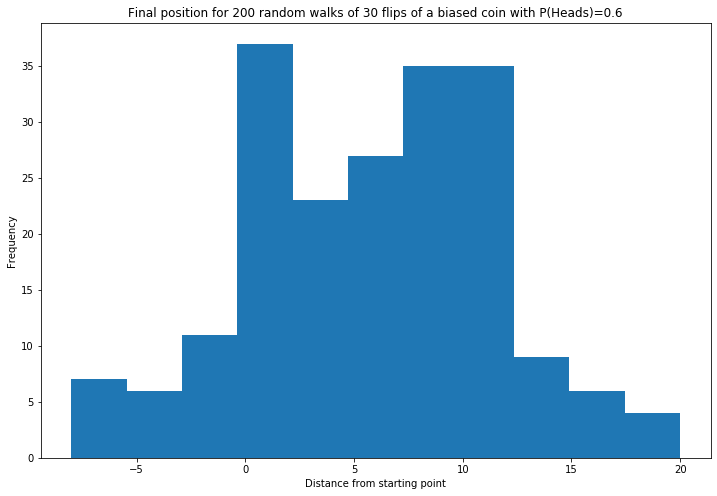

In [4]:
#Note the final position for 200 such random walks
number_of_walks = 200
final_position_list = [random_walk(steps, bias)[-1] for _ in range(number_of_walks)]

#Plot results in a histogram
plt.figure(figsize=(12, 8))
plt.hist(final_position_list, bins="auto")
plt.title("Final position for 200 random walks of 30 flips of a biased coin with P(Heads)=0.6")
plt.xlabel("Distance from starting point")
plt.ylabel("Frequency")
plt.show()

In [5]:
print(" Sample mean: {} \n Sample variance: {} \n Expected mean: {} \n Expected variance: {}"
      .format(np.mean(final_position_list),
                      np.var(final_position_list),
                      (0.6-0.4)*steps,
                      steps))

 Sample mean: 5.69 
 Sample variance: 31.6439 
 Expected mean: 5.999999999999998 
 Expected variance: 30


The expected value values for our descriptive statistics are quite similar to the empirical ones. As the number of walks, currently 200, grows larger we expect the discrepancy to shrink because of the law of large numbers.

In general, expected mean is given by (p-q) * n and the expected variance is given by the step-length, in our case 1, times the number of steps taken-–both are linear in the number of steps n.

## Excercise 9: Gambler's ruin with time limits
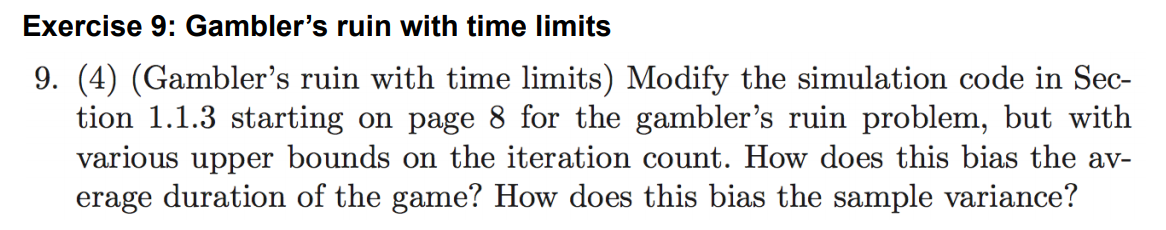

In [6]:
def gamblers_ruin(upper_bound = None):
    
    iter_count = 0
    gambler = 100
    house = 2000
    
    #Until the the upper bound on iter_count or the either the gambler or the house
    #goes broke
    while gambler > 0 and house > 0 and (not upper_bound or iter_count < upper_bound):
        
        if sts.uniform(0, 1).rvs() < .5:
            gambler += 1
            house -= 1
        
        else: 
            gambler -= 1
            house += 1
        
        iter_count += 1
            
    return iter_count

In [14]:
#Mean without limit
print("Average duration without upper limit on tieration count",np.mean([gamblers_ruin() for _ in range(30)]))

Average duration without upper limit on tieration count 166395.33333333334


In [11]:
bounds_list = list(range(100, 5000, 500))

duration_list = [np.mean([gamblers_ruin(x) for _ in range(30)])  for x in bounds_list]

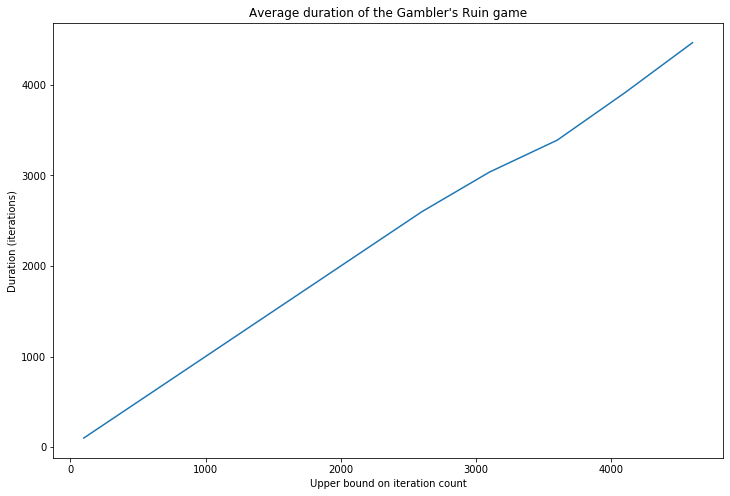

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(bounds_list, duration_list)
plt.title("Average duration of the Gambler's Ruin game")
plt.xlabel("Upper bound on iteration count")
plt.ylabel("Duration (iterations)")
plt.show()

In [17]:
np.var([gamblers_ruin() for _ in range(30)])

86306797986.84888

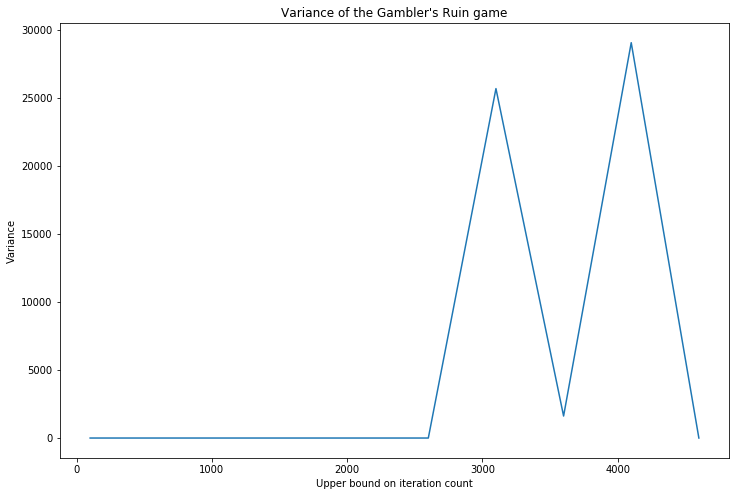

In [21]:
var_list = [np.var([gamblers_ruin(x) for _ in range(10)])  for x in bounds_list]

plt.figure(figsize=(12, 8))
plt.plot(bounds_list, var_list)
plt.title("Variance of the Gambler's Ruin game")
plt.xlabel("Upper bound on iteration count")
plt.ylabel("Variance")
plt.show()

As we can see, imposing an upper bound on the number of iterations permitted biases both the average duration and variance downwards. This is unsurprising: we expect the average to be lower, because it is always possible to go above the upper bound had it not been there; similarly, the upper bound constrains the set of possible durations, decreasing the variance. Simultaneously, we see that the higher, and thereby less restrictive, the upper bound is the weaker the downward bias.